# Lab 3 - Datacleaning with Pandas

Note: the dataset we use here is the Canadian Community Health Survey (CCHS), 2012: Mental Health Component. 



Lets import the dataset:


In [29]:
import pandas as pd
data = pd.read_csv("data/loanDataset.csv", header=0)

We can also see the dimension of the dataset using the shape method (in this case, the dataset has 613 rows and 13 columns)

In [30]:
data.shape

(614, 13)

We can see the descriptive stat of columns with numeric values, using describe() method:

In [31]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, you can draw by looking at the output of describe() function:

- LoanAmount has (614 – 592) 22 missing values.

- Loan_Amount_Term has (614 – 600) 14 missing values.

- Credit_History has (614 – 564) 50 missing values.

- We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)

- The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [32]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Subset

In [33]:
# By observations: e.g. get the first 100 observations (rows)

subset_1 = data.iloc[:100, :]
subset_1.shape

(100, 13)

In [34]:
# By variables: e.g. get the first 100 variables (columns)
    
subset_2 = data.iloc[:, :100]
subset_2.shape

(614, 13)

In [35]:
# By both: e.g. get the first 100*100 of the original dataset

subset_3 = data.iloc[:100,:100]
subset_3.shape

(100, 13)

## Missing Values

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset.

This command should tell us the number of missing values in each column as isnull() returns 1, if the value is null.

In [36]:
data.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are numerous ways to fill the missing values of a field, the simplest being replacement by mean, which can be done by following code:

In [37]:
import numpy as np

print "Num null in 'Loan_Amount_Term' before fill: ", sum(data['Loan_Amount_Term'].isnull())

meanLoadAmountTerm = np.mean(data.Loan_Amount_Term)
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(meanLoadAmountTerm)

print "Num null in 'Loan_Amount_Term' after fill: ", sum(data['Loan_Amount_Term'].isnull())

Num null in 'Loan_Amount_Term' before fill:  14
Num null in 'Loan_Amount_Term' after fill:  0


The other extreme could be to build a supervised learning model to predict age on the basis of other variables and then use age along with other variables to predict survival.

Since, the purpose of this tutorial is to bring out the steps in data munging, I’ll rather take an approach, which lies some where in between these 2 extremes. 

The key hypothesis is that the 'Loan_Amount_Term' is depended on other features, for example, 'Education'. Indiviuals who have 'Graduated' may have a different loan term compared to 'Not Graudate'. So instead of just filling the missing values with the mean across the entire dataset, we can fill the feature 'Loan_Amount_Term' based on the mean of the applicable features. So, for an indivual who has a missing 'Loan_Term_Amount' and is a 'Graduate', we would fill the missing value with '154'.

In [38]:
data.groupby('Education')['LoanAmount'].mean()


Education
Graduate        154.060215
Not Graduate    118.409449
Name: LoanAmount, dtype: float64

## Drop data

Check missing values in the dataset

Let us look at "LoanAmount' to start off with. A first glance at the variable leaves us with an impression that there are too some NaNs or blanks in the dataset. So, let us check the number of nulls / NaNs in the dataset.

In [39]:
sum(data['Credit_History'].isnull()) 

50

The above should tell us the number of missing values for this column, which turns out to be 14. Its likely we can't do anything interesting with this dataset if it has missing values for the 'LoanAmount'. Lets drop rows that have a NAN or blank for this column.

In [40]:
data = data.dropna(subset = ['Credit_History']) # drop rows that have a null value for this column
sum(data['Credit_History'].isnull()) # print number once more to verify its zero


0

In [41]:
# lets do the same for ApplicantIncome
data = data.dropna(subset = ['ApplicantIncome']) # drop rows that have a null value for this column
sum(data['ApplicantIncome'].isnull()) # print number once more to verify its zero

0

## Distribution analysis



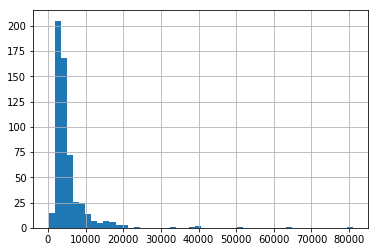

In [42]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

# plot histogram 
data['ApplicantIncome'].hist(bins=50)
plt.show()

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

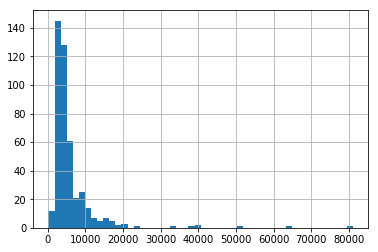

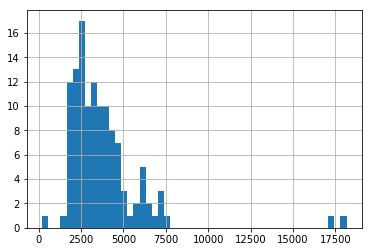

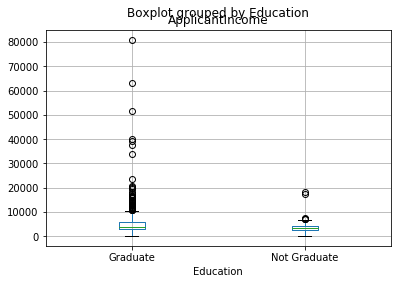

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

graduate = data.loc[data['Education'] == "Graduate"]
nonGraduate = data.loc[data['Education'] == "Not Graduate"]
graduate['ApplicantIncome'].hist(bins=50)
plt.show()
nonGraduate['ApplicantIncome'].hist(bins=50)
plt.show()

data.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.



## Categorical Variable Analysis

let us understand categorical variables in more details, specifically the field 'Credit_History' where 1 denotes the applicant has a good credit history, and 0 denotes that they have less than a steller record. 

In [44]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


Now we can observe that we get a 'pivot-table', and this can also ve plotted as a bar chart using the “matplotlib” library with following code:

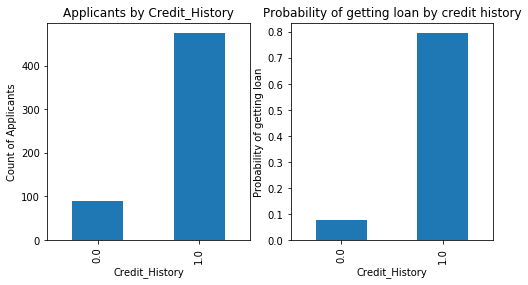

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

# fig1 - Applicant count by credit history
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

# fig2 - Probability of getting a loan based on your credit history record
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

plt.show()

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Alternately, these two plots can also be visualized by combining them in a stacked chart::

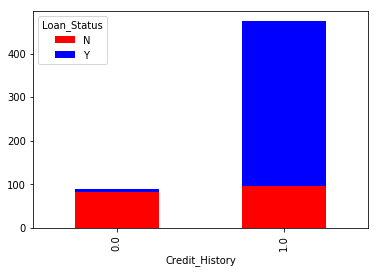

In [54]:
temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

TODO: Your task now is to clean the rest of the dataset to either fill-in missing values, or drop rows with missing data. 

# Transform Category Features

After, we have made the data useful/clean for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose. 

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:


In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores. Since this is an introductory lab, I will not go into the details of coding. In the next lab, we will cover in more depth the classification and regression problems and how to perform modeling. 

In [59]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### A quick look at Logistic Regression

Let’s make our first Logistic Regression model (classification task). One way would be to take all the variables into the model but this might result in overfitting (don’t worry if you’re unaware of this terminology yet). In simple words, taking all variables might result in the model understanding complex relations specific to the data and will not generalize well. Read more about Logistic Regression.

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

1. Applicants having a credit history (remember we observed this in exploration?)
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

So let’s make our first model with ‘Credit_History’.

In [61]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 81.560%
Cross-Validation Score : 81.564%


In [62]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 81.560%
Cross-Validation Score : 81.564%


Generally we expect the accuracy to increase on adding variables. But this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

Feature Engineering: dereive new information and try to predict those. I will leave this to your creativity.
Better modeling techniques. Let’s explore this next time. 